In [1]:
import yfinance as yf
import numpy as np

# Download stock data
ticker = 'AMBUJACEM.BO'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2024-07-03')

print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-01  197.399994  197.699997  196.000000  196.850006  175.912598   71954
2020-01-02  197.300003  206.500000  197.300003  205.399994  183.553177  451248
2020-01-03  205.500000  205.600006  202.449997  203.399994  181.765900   69640
2020-01-06  201.000000  202.149994  196.350006  196.850006  175.912598   82570
2020-01-07  202.800003  202.899994  196.649994  199.100006  177.923279  170367


In [2]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data.head(30)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20
Date,,,,,,,,
2020-01-01,197.399994,197.699997,196.000000,196.850006,175.912598,71954,NaN,196.850006
2020-01-02,197.300003,206.500000,197.300003,205.399994,183.553177,451248,NaN,197.664291
2020-01-03,205.500000,205.600006,202.449997,203.399994,181.765900,69640,NaN,198.210548
2020-01-06,201.000000,202.149994,196.350006,196.850006,175.912598,82570,NaN,198.080973
2020-01-07,202.800003,202.899994,196.649994,199.100006,177.923279,170367,NaN,198.178023
2020-01-08,197.699997,204.500000,195.649994,201.649994,180.202042,310791,NaN,198.508687
2020-01-09,204.500000,209.250000,204.000000,207.949997,185.831970,356560,NaN,199.407860
2020-01-10,208.100006,213.899994,206.899994,211.649994,189.138428,210546,NaN,200.573777
2020-01-13,212.000000,214.350006,210.600006,211.449997,188.959686,147522,NaN,201.609608


In [3]:
def aroon(data, window):
    df = data.copy()
    df['Aroon Up'] = df['Close'].rolling(window).apply(lambda x: (window - np.argmax(x[::-1])) / window * 100, raw=False)
    df['Aroon Down'] = df['Close'].rolling(window).apply(lambda x: (window - np.argmin(x[::-1])) / window * 100, raw=False)
    return df

# Calculate Aroon Indicator with a window of 25 periods
window = 25
aroon_data = aroon(data, window)

print(aroon_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-26  649.000000  665.799988  648.750000  656.900024  656.900024   
2024-06-27  659.349976  677.000000  652.450012  660.549988  660.549988   
2024-06-28  668.250000  674.950012  660.000000  670.049988  670.049988   
2024-07-01  668.950012  701.450012  663.799988  694.700012  694.700012   
2024-07-02  695.500000  706.849976  679.349976  691.750000  691.750000   

            Volume      SMA_20      EMA_20  Aroon Up  Aroon Down  
Date                                                              
2024-06-26  276049  642.610001  646.779668      72.0        40.0  
2024-06-27  338230  644.132501  648.091127      68.0        36.0  
2024-06-28  163769  646.700000  650.182447      64.0        32.0  
2024-07-01  340427  649.720001  654.422215     100.0        28.0  
2024-07-02  267326  650.777502  657.977242      96.0        24.0  


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


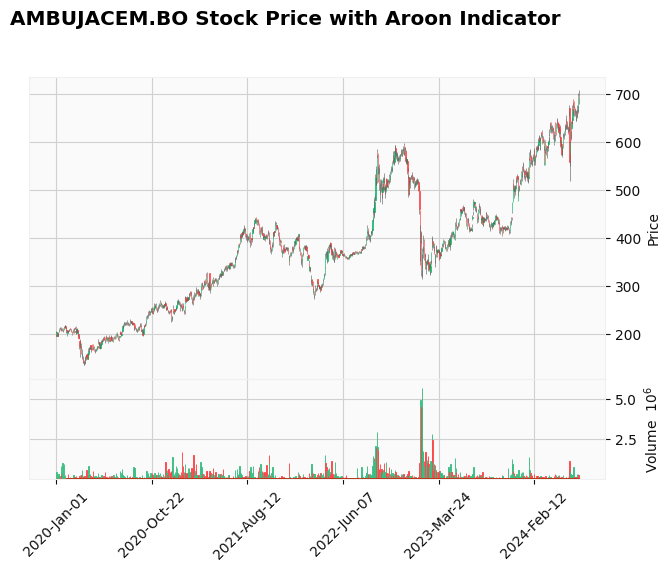

In [8]:
# Merge Aroon data with the original data
import mplfinance as mpf
import matplotlib.pyplot as plt
data['Aroon Up'] = aroon_data['Aroon Up']
data['Aroon Down'] = aroon_data['Aroon Down']

# Define additional plots for Aroon indicators
apds = [
    mpf.make_addplot(data['Aroon Up'], panel=1, color='green', secondary_y=False, ylabel='Aroon Up/Down'),
    mpf.make_addplot(data['Aroon Down'], panel=1, color='red', secondary_y=False)
]

# Plot candlestick chart with additional indicators
mpf.plot(data, type='candle', addplot=apds, volume=True, title=f'{ticker} Stock Price with Aroon Indicator', style='yahoo', panel_ratios=(3, 1))

# Display the plot
plt.show()

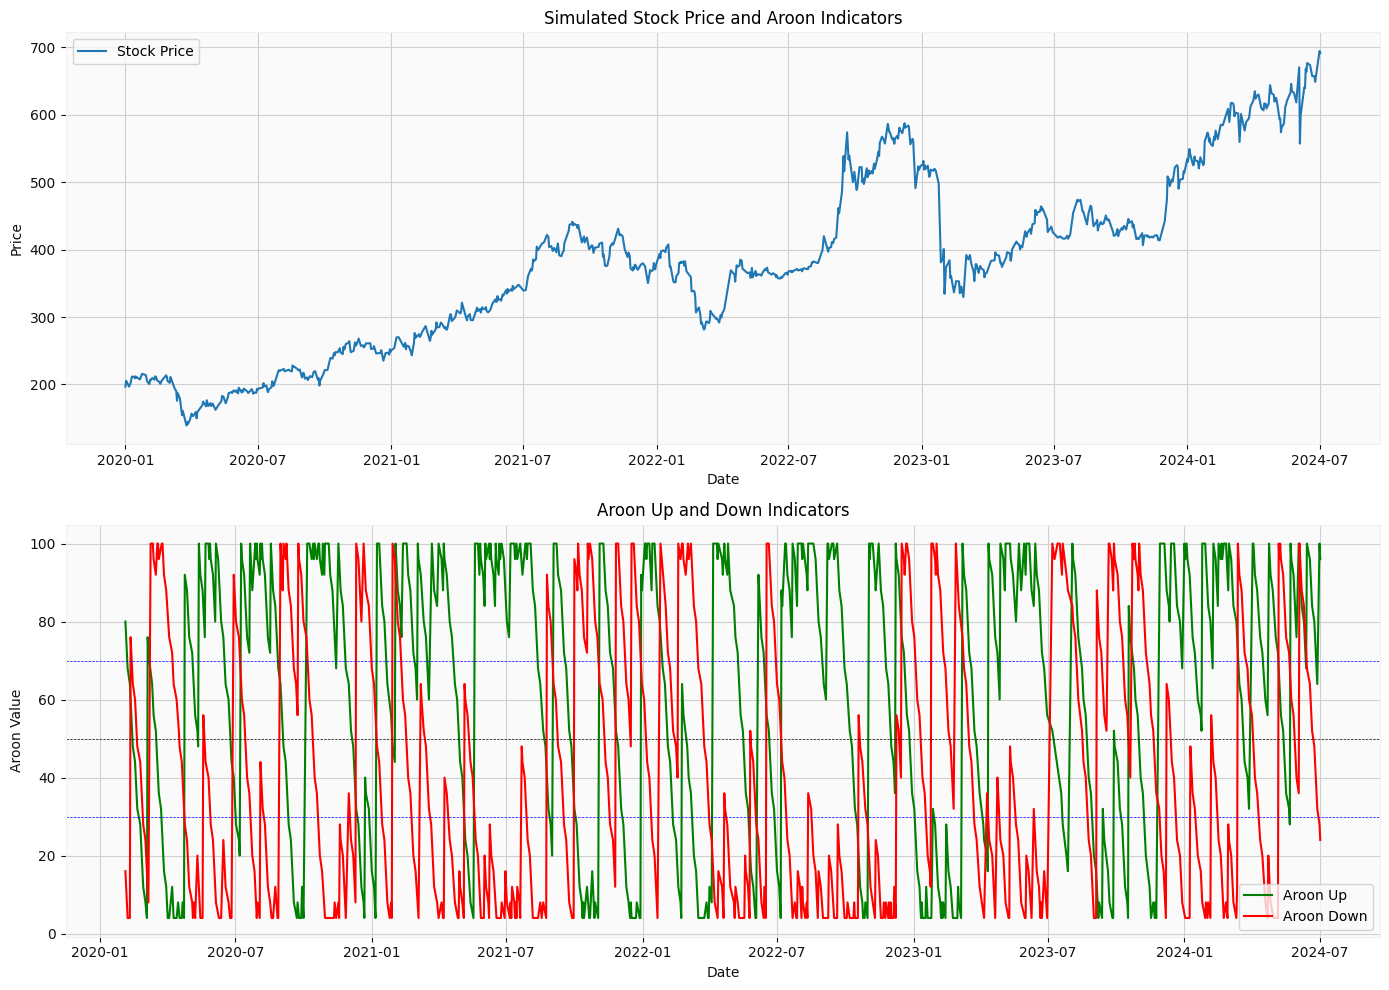

In [9]:
plt.figure(figsize=(14, 10))

# Subplot 1: Stock Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Stock Price')
plt.title('Simulated Stock Price and Aroon Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Aroon Indicators
plt.subplot(2, 1, 2)
plt.plot(aroon_data['Aroon Up'], label='Aroon Up', color='green')
plt.plot(aroon_data['Aroon Down'], label='Aroon Down', color='red')
plt.axhline(50, color='black', linestyle='--', linewidth=0.5)
plt.axhline(70, color='blue', linestyle='--', linewidth=0.5)
plt.axhline(30, color='blue', linestyle='--', linewidth=0.5)
plt.title('Aroon Up and Down Indicators')
plt.xlabel('Date')
plt.ylabel('Aroon Value')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [10]:
def wma(series, period):
    weights = list(range(1, period + 1))
    return series.rolling(period).apply(lambda prices: (prices * weights).sum() / sum(weights), raw=True)

def wavetrend(data, short_period, long_period, signal_period):
    df = data.copy()
    df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['WT'] = wma(wma(df['TP'], short_period), long_period)
    df['WT Signal'] = df['WT'].rolling(signal_period).mean()
    df['Wave Momentum'] = df['WT'] - df['WT Signal']
    return df

# Calculate WaveTrend Indicator
short_period = 10
long_period = 21
signal_period = 4
wavetrend_data = wavetrend(data, short_period, long_period, signal_period)

print(wavetrend_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-26  649.000000  665.799988  648.750000  656.900024  656.900024   
2024-06-27  659.349976  677.000000  652.450012  660.549988  660.549988   
2024-06-28  668.250000  674.950012  660.000000  670.049988  670.049988   
2024-07-01  668.950012  701.450012  663.799988  694.700012  694.700012   
2024-07-02  695.500000  706.849976  679.349976  691.750000  691.750000   

            Volume      SMA_20      EMA_20  Aroon Up  Aroon Down          TP  \
Date                                                                           
2024-06-26  276049  642.610001  646.779668      72.0        40.0  657.150004   
2024-06-27  338230  644.132501  648.091127      68.0        36.0  663.333333   
2024-06-28  163769  646.700000  650.182447      64.0        32.0  668.333333   
2024-07-01  340427  649.720001  654.422215     100.0        28.0  686.650004   
2